In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iot_telemetry_data.csv')

In [3]:
print(df)

                  ts             device        co   humidity  light       lpg  \
0       1.594512e+09  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   
1       1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   
2       1.594512e+09  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   
3       1.594512e+09  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   
4       1.594512e+09  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   
...              ...                ...       ...        ...    ...       ...   
405179  1.595203e+09  00:0f:00:70:91:0a  0.003745  75.300003  False  0.006247   
405180  1.595203e+09  b8:27:eb:bf:9d:51  0.005882  48.500000  False  0.008660   
405181  1.595203e+09  1c:bf:ce:15:ec:4d  0.004540  75.699997   True  0.007181   
405182  1.595203e+09  00:0f:00:70:91:0a  0.003745  75.300003  False  0.006247   
405183  1.595203e+09  b8:27:eb:bf:9d:51  0.005914  48.400000  False  0.008695   

        motion     smoke   

In [11]:
#df.loc[df['col1'] == value]


devices = list(set(df['device']))
device_data = {device: None for device in devices}
for device in devices:
    device_data[device] = df.loc[df['device'] == device]
print(devices)

['00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d', 'b8:27:eb:bf:9d:51']


In [67]:
timestamps = [pd.Timestamp(t) for t in device_data[devices[0]]['ts']]
print(timestamps[1])
print(timestamps[0])

print(1.594512094-1.594512106)
                                                    

1970-01-01 00:00:01.594512106
1970-01-01 00:00:01.594512094
-1.2000000104706032e-08


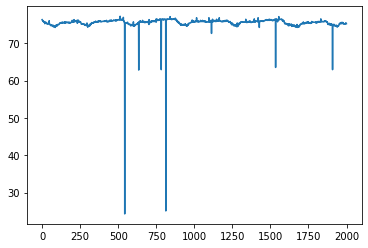

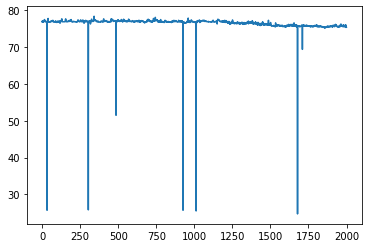

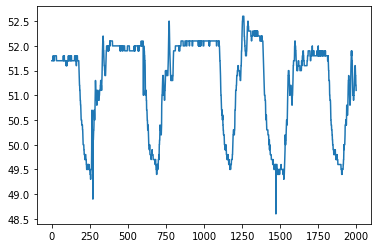

In [94]:
def visualize_data(key, start=2000, stop=4000):

    for i in range(len(devices)):
        data = np.asarray(device_data[devices[i]][key])
        plt.figure()
        plt.plot(data[start:stop])
        plt.show()
        
visualize_data('humidity')


In [98]:
from scipy.signal import medfilt

co = np.asarray(device_data[devices[2]]['humidity'])

filt_co = medfilt(co, kernel_size=21)
print(co.shape, filt_co.shape)

(187451,) (187451,)


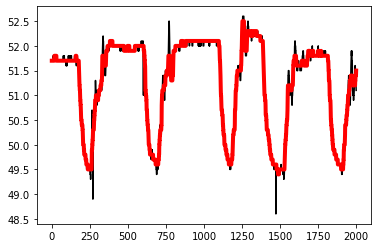

In [99]:
plt.figure()
plt.plot(co[2000:4000], color='k')
plt.plot(filt_co[2000:4000], color='r', linewidth=4)

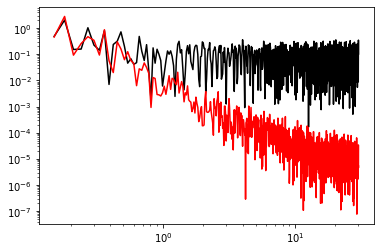

In [97]:
from scipy.signal import periodogram

fn, Pn = periodogram(co[2000:4000], fs=60.0)
ff, Pf = periodogram(filt_co[2000:4000], fs=60.0)

plt.figure()
plt.loglog(fn[5:], Pn[5:], color='k')
plt.loglog(ff[5:], Pf[5:], color='r')